In [103]:
# Importing required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Loading the dataset into a pandas DataFrame

data = pd.read_csv("retail_data_visualization.csv")

data

In [160]:
# Displaying the first few rows of the dataset

data.head(2)

,Date,Region,Product Category,Product Name,Units Sold,Unit Price,Revenue,Cost Price,Profit,Customer Age Group,Customer Rating,Sales Channel,Discount (%),Returns
0,2024-01-01,East,Groceries,Desk,45,215.92,9716.40,347.28,-5911.20,46-60,4,In-Store,14.71,Yes
1,2024-01-02,West,Furniture,Chair,32,115.18,3685.76,143.60,-909.44,60+,3,In-Store,45.59,Yes


In [57]:
# Checking the number of rows and columns in the dataset

data.shape

(200, 14)

In [58]:
# Displaying information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                200 non-null    object 
 1   Region              200 non-null    object 
 2   Product Category    200 non-null    object 
 3   Product Name        200 non-null    object 
 4   Units Sold          200 non-null    int64  
 5   Unit Price          200 non-null    float64
 6   Revenue             200 non-null    float64
 7   Cost Price          200 non-null    float64
 8   Profit              200 non-null    float64
 9   Customer Age Group  200 non-null    object 
 10  Customer Rating     200 non-null    int64  
 11  Sales Channel       200 non-null    object 
 12  Discount (%)        200 non-null    float64
 13  Returns             200 non-null    object 
dtypes: float64(5), int64(2), object(7)
memory usage: 22.0+ KB


In [59]:
# Generating descriptive statistics for numerical columns

data.describe()

,Units Sold,Unit Price,Revenue,Cost Price,Profit,Customer Rating,Discount (%)
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,25.835000,247.925500,6594.715650,206.732600,1408.773800,2.975000,24.574000
std,13.576427,138.640295,5346.333833,110.600087,5382.734139,1.457738,13.590881
min,1.000000,6.280000,69.690000,4.080000,-13611.220000,1.000000,0.060000
25%,14.000000,130.485000,2304.720000,114.142500,-1485.930000,2.000000,12.690000
50%,26.000000,242.975000,5496.425000,216.635000,971.260000,3.000000,24.950000
75%,36.000000,365.892500,10068.142500,297.637500,3868.007500,4.000000,33.645000
max,49.000000,497.940000,24026.170000,399.080000,21094.990000,5.000000,49.610000


In [107]:
# Checking for missing values in the dataset

data.isnull().sum()

Date                  0
Region                0
Product Category      0
Product Name          0
Units Sold            0
Unit Price            0
Revenue               0
Cost Price            0
Profit                0
Customer Age Group    0
Customer Rating       0
Sales Channel         0
Discount (%)          0
Returns               0
dtype: int64

In [105]:
# Checking for duplicate rows in the dataset

data.duplicated().sum()

0

## Data Visualization in Python

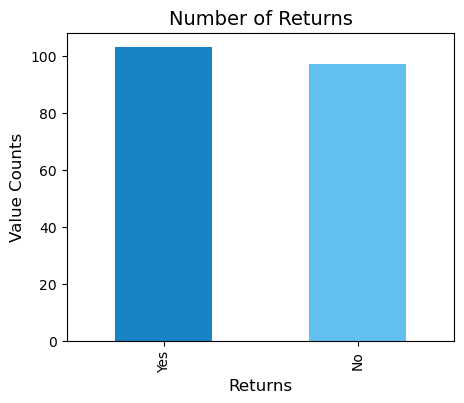

In [112]:
# Plotting a bar chart to visualize the count of "Returns"

# Calculate the count of each unique value ("Yes" or "No") in the "Returns" column
return_count = data["Returns"].value_counts()

# Bar chart: Number of Returns
return_count.plot(kind="bar", figsize=(5, 4), color=["#1984c5", "#63bff0"])

# Adding labels and titles 
plt.xlabel("Returns", fontsize=12)
plt.ylabel("Value Counts", fontsize=12)
plt.title("Number of Returns", fontsize=14)

# Display the bar chart
plt.show()


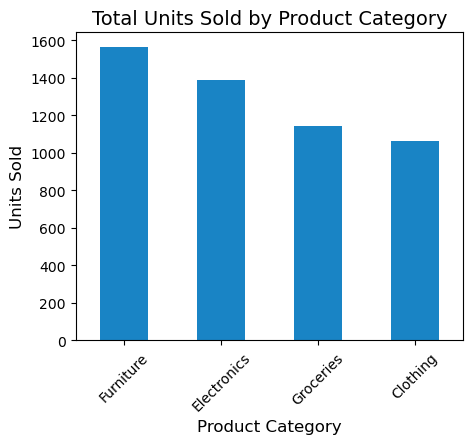

In [127]:
# Plotting a bar chart of Product Category by Units Sold

# Aggregate the data
category_units = data.groupby("Product Category")["Units Sold"].sum()

# Sort in descending order
sorted_category = category_units.sort_values(ascending= False)

# Bar chart: Product Category vs. Units Sold
sorted_category.plot (kind = "bar", figsize=(5, 4), color=["#1984c5"])       

# Adding labels and titles 
plt.title("Total Units Sold by Product Category", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Display the bar chart
plt.show()


Bar charts are typically used to compare the frequency or count of categories within a dataset. It displays categories on the x-axis and values on the y-axis.


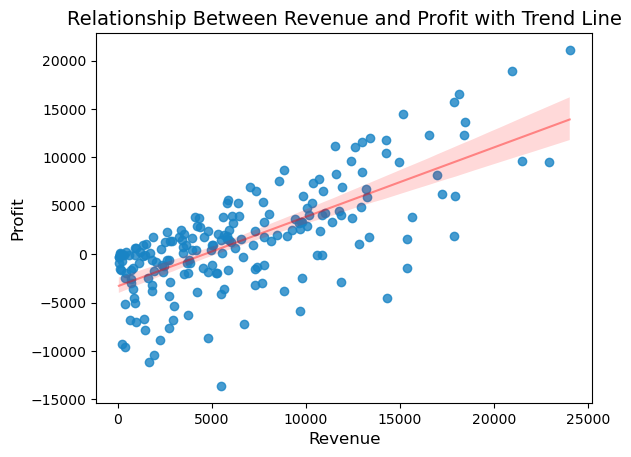

In [131]:
## Scatter plot with trend line: Revenue and Profit

sns.regplot(x="Revenue", y="Profit", data=data, color="#1984c5",
    line_kws={"color": "red", "alpha": 0.4, "lw": 1.5}  # Trend line style 
    )

# Add a title and axis labels
plt.title("Relationship Between Revenue and Profit with Trend Line", fontsize=14)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Profit", fontsize=12)

# Display the scatter plot
plt.show()

A scatter plot shows the relationship between two continuous variables. It plots individual data points and can reveal correlations or patterns.

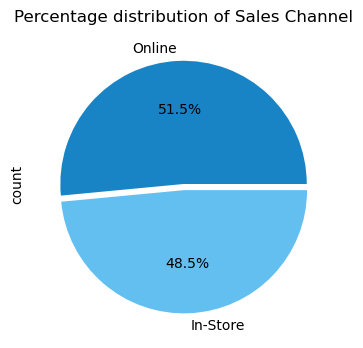

In [138]:
# Plotting a pie chart of Sales Channel

# Calculate the count of each unique value ("Online" or "In store") in the "Sales Channel" column
channel_counts = data["Sales Channel"].value_counts()

# Pie chart: Sales Channel
channel_counts.plot(kind = "pie", figsize = (5, 4), autopct="%1.1f%%", explode = (0, 0.05), 
                    colors = ["#1984c5", "#63bff0"])

# Add a title and axis labels
plt.title("Percentage distribution of Sales Channel")

# Display the pie chart
plt.show()

Pie chart shows the proportion of categories within a whole, with slices representing different categories and their relative sizes.

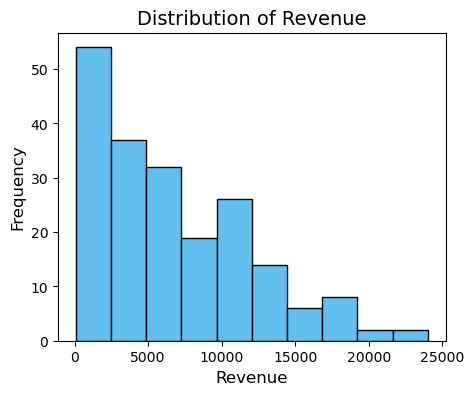

In [158]:
# Plotting a histogram to visualize the distribution of Revenue
data["Revenue"].hist(bins=10, color="#63bff0", edgecolor="black",  figsize=(5, 4))

# Add labels and title for better understanding
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Revenue", fontsize=14)

# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()


Histogram shows the distribution of a single continuous variable. It divides the range of values into bins and counts the number of occurrences in each bin.

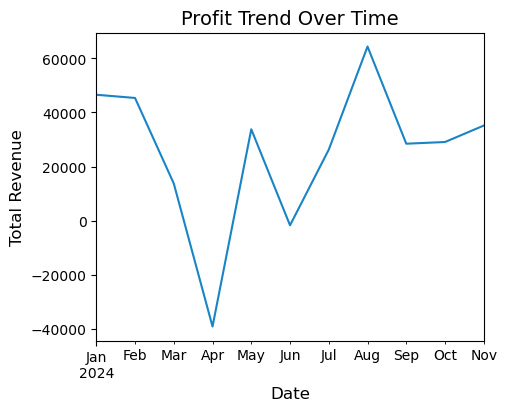

In [154]:
# Plotting a line chart of profit over time
# Convert "Date" to datetime format
data["Date"] = pd.to_datetime(data["Date"], format="%m-%d-%Y")

# Group data by month and sum "Profit" for each month
profit_overtime = data.groupby(data["Date"].dt.to_period("M"))["Profit"].sum()

# Line chart: Profit trend over time
profit_overtime.plot(kind="line", color="#1984c5", figsize=(5, 4))

# Adding titles and labels to the chart
plt.title("Profit Trend Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)

# to display line chart
plt.show()


Line charts visualize trends over time or continuous data. Points are connected by lines to show how values change at different intervals.

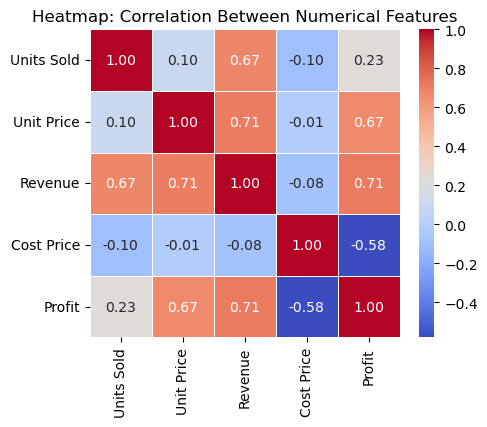

In [162]:
# Plotting a correlation heatmap of numerical values
plt.figure(figsize=(5, 4))
correlation_matrix = data[["Units Sold", "Unit Price", "Revenue", "Cost Price", "Profit"]].corr()

# Heatmap of numerical values
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10}, linewidths=0.5)

# Adding title to the chart
plt.title("Heatmap: Correlation Between Numerical Features")

# to display heatmap
plt.show()



- The heatmap shows the relationships between the numerical variables. 

- It shows a mix of positive and negative correlations, with some variables being strongly related, while others have a weaker or no significant relationship.

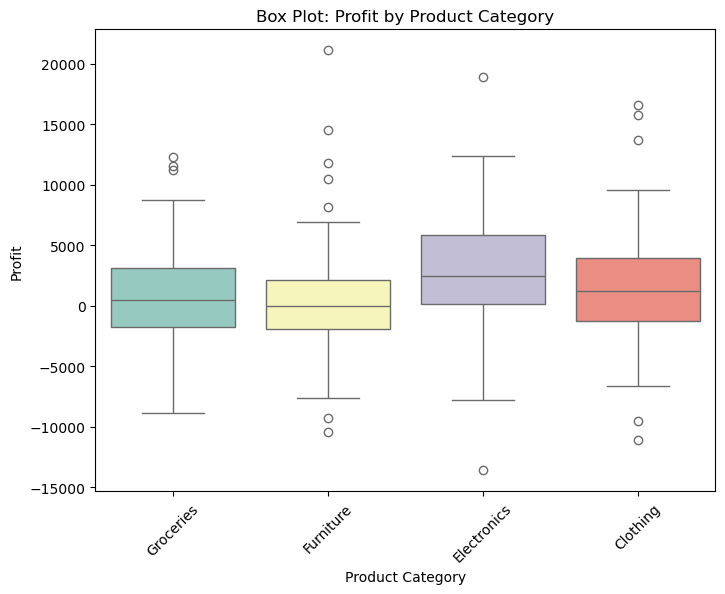

In [166]:
# Plotting a boxplot of Profit by Product Category
plt.figure(figsize=(8, 6))

# Box plot: Profit by Product Category
sns.boxplot(data=data, x="Product Category", y="Profit", palette="Set3", hue = "Product Category", legend=False)

# Adding axis labels and titles
plt.title("Box Plot: Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)

# to display boxplot
plt.show()


- The box plot helps identify how profit varies within each product category, revealing the spread of profits, any outliers, and general trends like higher or lower medians.

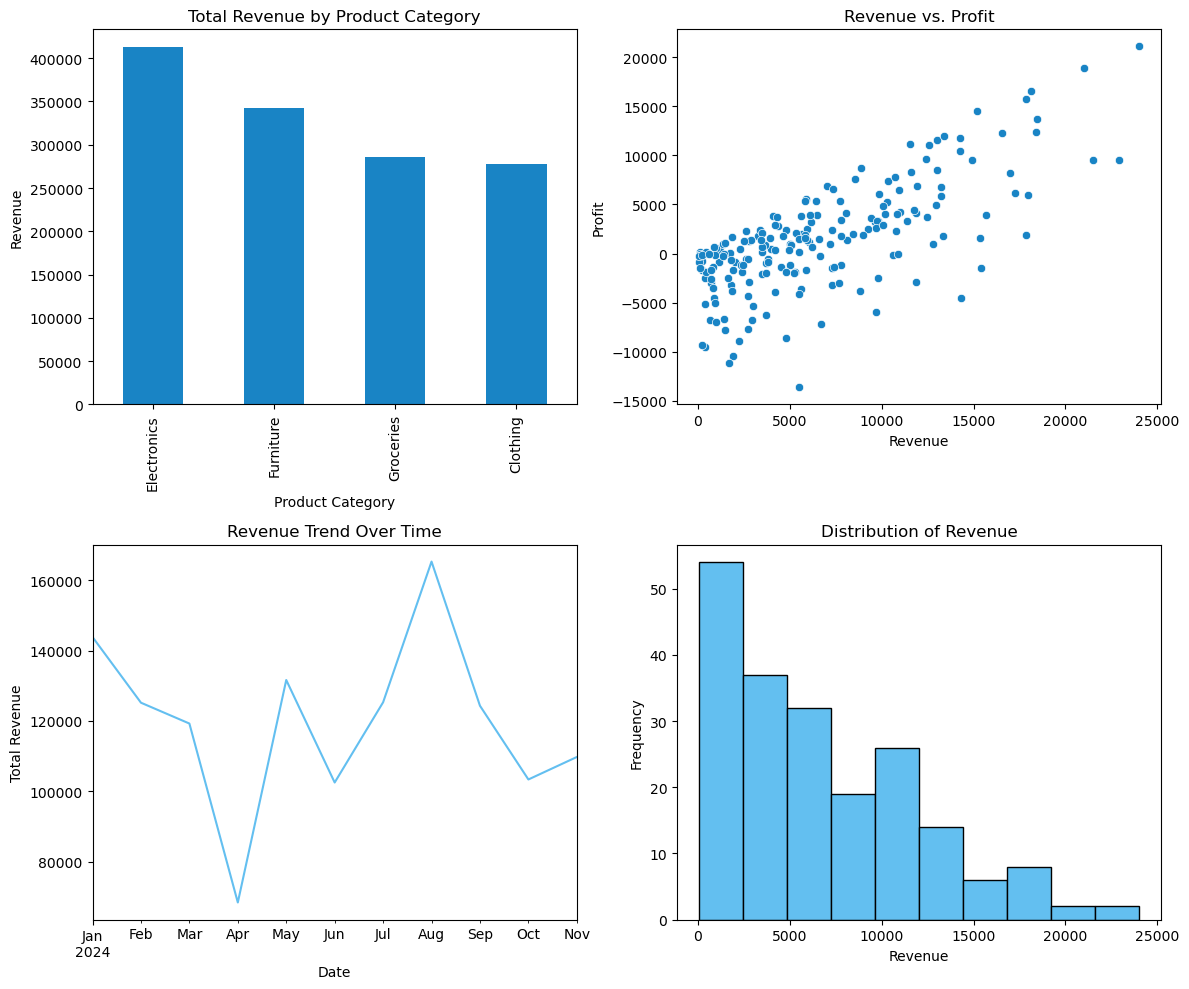

In [174]:
# Plotting a subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Bar chart of Revenue by Product Category
category_units = data.groupby("Product Category")["Revenue"].sum()
sorted_category = category_units.sort_values(ascending= False).plot(kind="bar", color=["#1984c5"], ax=axes[0, 0])     
axes[0, 0].set_title("Total Revenue by Product Category")
axes[0, 0].set_xlabel("Product Category")
axes[0, 0].set_ylabel("Revenue")


# 2. Scatter plot of Revenue vs. Profit
sns.scatterplot(x="Revenue", y="Profit", color="#1984c5",data=data, ax=axes[0, 1])
axes[0, 1].set_title("Revenue vs. Profit")
axes[0, 1].set_xlabel("Revenue")
axes[0, 1].set_ylabel("Profit")

# 3. Line plot of Revenue trend over time
revenue_overtime = data.groupby(data["Date"].dt.to_period("M"))["Revenue"].sum()
revenue_overtime.plot(kind="line", color="#63bff0", ax=axes[1, 0])
axes[1, 0].set_title("Revenue Trend Over Time")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Total Revenue")

# 4. Histogram of Revenue distribution
axes[1, 1].hist(data["Revenue"], bins=10, color="#63bff0", edgecolor="black")
axes[1, 1].set_title("Distribution of Revenue")
axes[1, 1].set_xlabel("Revenue")
axes[1, 1].set_ylabel("Frequency")

# Adjust the layout to prevent overlapping
plt.tight_layout()

# display the subplot
plt.show()


- Subplots allow for the presentation of multiple aspects of the data in a compact, organized way.

- By arranging different types of plots (e.g., bar charts, scatter plots, line charts, etc.) in a grid layout, subplots allow for the simultaneous display of various relationships and distributions.